In [1]:
#Importing required modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the CSV
df = pd.read_csv("FuelConsumption.csv")

#look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
#summarize the dataset
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
#Select some features
fdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

fdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


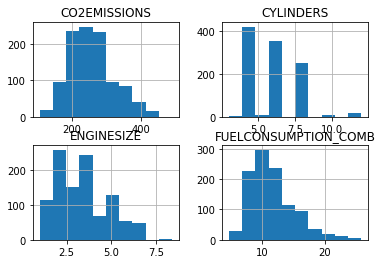

In [5]:
#Plot each of this
viz = fdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

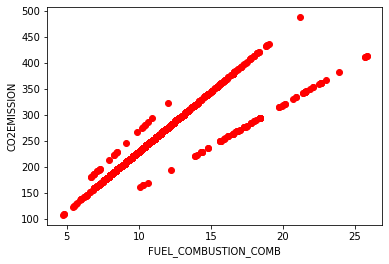

In [6]:
# Now lets plot each of these features vs Emission
plt.scatter(fdf.FUELCONSUMPTION_COMB,fdf.CO2EMISSIONS,color="red")
plt.xlabel("FUEL_COMBUSTION_COMB")
plt.ylabel("CO2EMISSION")
plt.show()

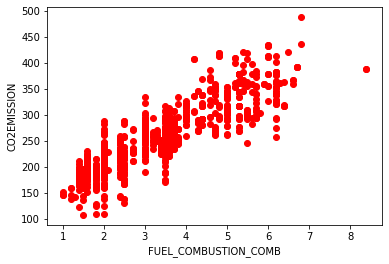

In [7]:
plt.scatter(fdf.ENGINESIZE,fdf.CO2EMISSIONS,color="red")
plt.xlabel("FUEL_COMBUSTION_COMB")
plt.ylabel("CO2EMISSION")
plt.show()

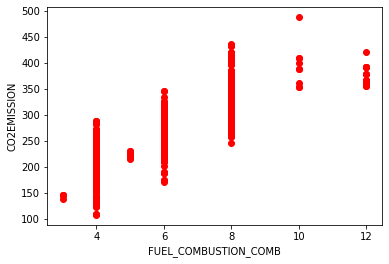

In [8]:
plt.scatter(fdf.CYLINDERS,fdf.CO2EMISSIONS,color="red")
plt.xlabel("FUEL_COMBUSTION_COMB")
plt.ylabel("CO2EMISSION")
plt.show()

In [9]:
#Split dataset into train and tet dataset
msk = np.random.rand(len(df))<0.8
train = fdf[msk]
test=fdf[~msk]

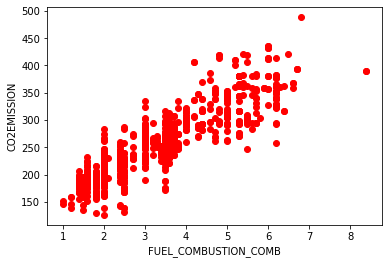

In [10]:
#plot Train data 
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color="red")
plt.xlabel("FUEL_COMBUSTION_COMB")
plt.ylabel("CO2EMISSION")
plt.show()

In [11]:
#MODELLING using Simple Linear Regression
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
X_train = np.asanyarray(train[['ENGINESIZE']])
Y_train = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit(X_train,Y_train) #training
#the coefficients 
print("Coefficients : ", regr.coef_)
print("intercept : ", regr.intercept_)


Coefficients :  [[38.99960415]]
intercept :  [125.76167291]


Text(0, 0.5, 'EMISSION')

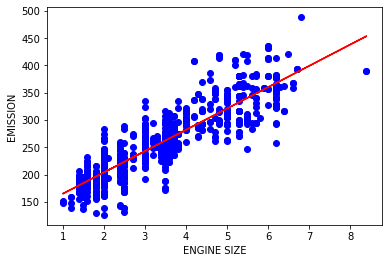

In [12]:
#Plot Output
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color ="blue")
plt.plot(X_train,regr.coef_[0][0]*X_train+regr.intercept_[0],'-r')
plt.xlabel("ENGINE SIZE")
plt.ylabel("EMISSION")

In [13]:
#Eveluation of Model
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 25.01
Residual sum of squares (MSE): 1030.54
R2-score: 0.66
